In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\LRG\\Desktop\\train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df[['Cabin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cabin   204 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


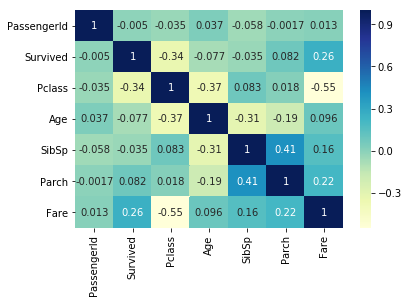

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

observation 1:  The survival is highly positively correlated with Fare,then with Parch
                The survival is highly negitively correlated with Pclass then with Age

In [159]:
#sns.jointplot('Age','Survived',data=df,kind='hex')
gp=df.groupby(['Survived','Age']).agg('count')[['PassengerId']]

# code to see which age group people died mostly i.e 21

#gp[gp['PassengerId']==max(gp['PassengerId'])]

#code to see the age group wise death in descending order of no of deaths in each age

#gp.sort_values('PassengerId',ascending=False)

PassengerId
Survived Age              
0        21.0           19
         28.0           18
         25.0           17
         18.0           17
         22.0           16
         19.0           16
1        24.0           15
0        30.0           15
         24.0           15
         26.0           12
         20.0           12
         29.0           12
         36.0           11
         16.0           11
1        36.0           11
         35.0           11
         22.0           11
         27.0           11
         30.0           10
0        23.0           10

observation 2=from the above we can say that people between age group 18-35 were more survived and more died

0    549
1    342
Name: Survived, dtype: int64 <class 'pandas.core.series.Series'>
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


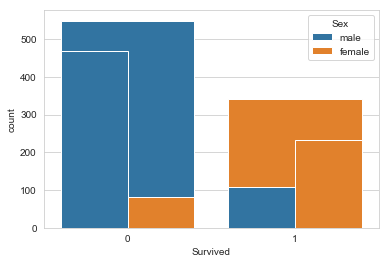

In [4]:
sns.set_style("whitegrid")
print(df['Survived'].value_counts(),type(df['Survived']))
print(sns.countplot('Survived',data=df))
print(sns.countplot('Survived',hue='Sex',data=df))

observation 3 = More people died than people survived
                More men died than women

In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

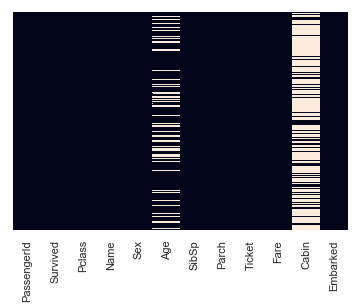

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

observation 4: Most of the cabin details are unavailable and approximately 30% of the age data is missing which can be                        replacable

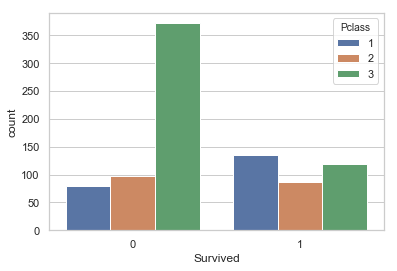

In [137]:
sns.countplot(x='Survived',hue='Pclass',data=df)

observation 5= The people dies are mostly belongs to 3rd passenger class and most survived people are of 1st class

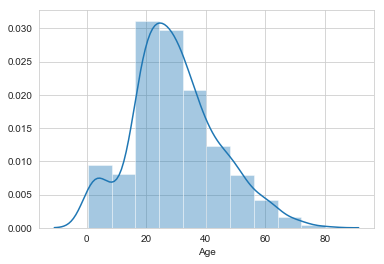

In [6]:
sns.distplot(df['Age'].dropna(),bins=10)

In [ ]:
observation 6= Most people travelling in the ship belongs to the age group of 18-35

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


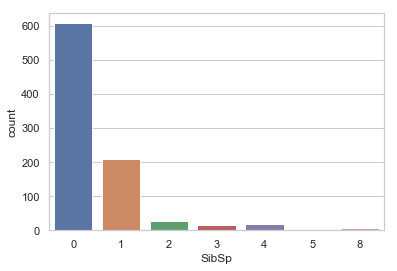

In [96]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df)


observation 7: Most people travelled alone and only few travelled with 1 of their family person

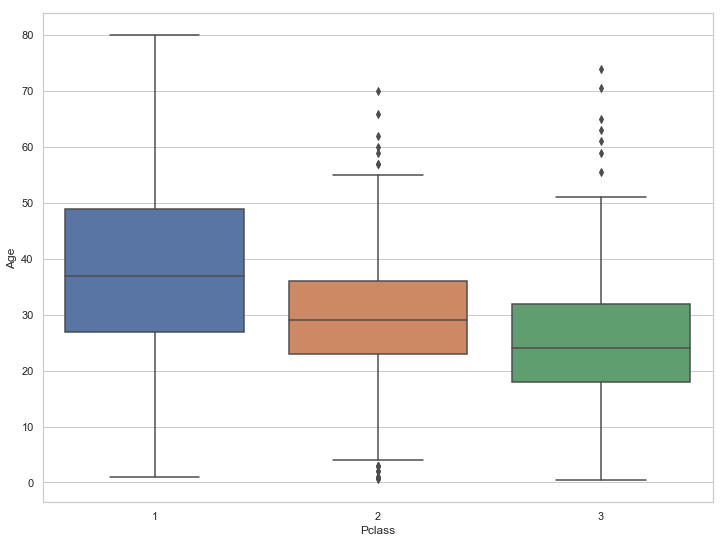

In [106]:
#Handling Missing Data

#Draw a box plot for the missing values column..so that u will get all percentile values for every category of that column

#choose the mean value of each category and replace with appropriate category's mean

plt.figure(figsize=(12,9))
sns.boxplot('Pclass','Age',data=df)


Observation 8: Higher class passenger(i.e class 1) are older (which makes sense ) on average because their avg age is approx 38


In [108]:
#so replace missing values in age column for pclass1 passengers with 38 ,pclass2 with 29,pclass3 with 24

In [15]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isna(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 24
    return age

In [16]:
#apply the above function on df
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

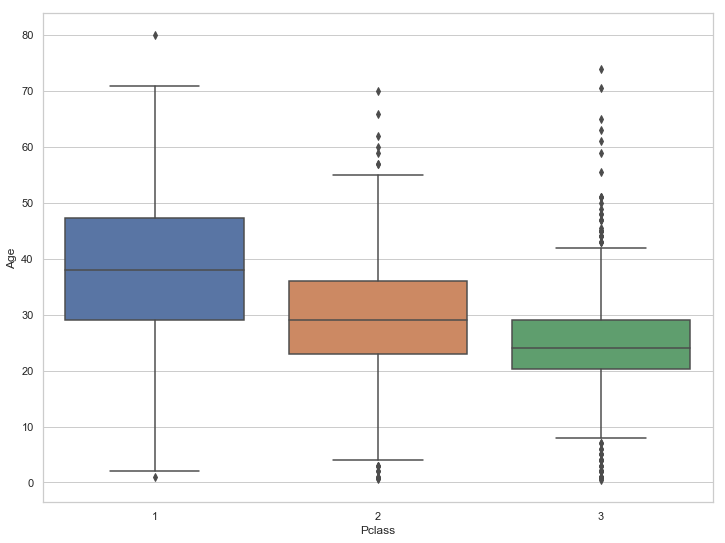

In [113]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.figure(figsize=(12,9))
sns.boxplot('Pclass','Age',data=df)

In [124]:
#as there are many null values in cabin..it is very difficult to replace those values
df=df.drop(columns=['Cabin'])
#or
#df.dropna(inplace=True)

In [120]:
#Converting Categorical data

gender=pd.get_dummies(df['Sex'],drop_first=True) #dropping 1st col to avoid dummy variable trap
embark=pd.get_dummies(df['Embarked'],drop_first=True) #dropping 1st col to avoid dummy variable trap

#drop the unnecessary columns
df.drop(columns=['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [126]:
#concat the encoded columns

df=pd.concat([df,gender,embark],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [49]:
#Build a Logistic regression model

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Survived',axis=1),df['Survived'],random_state=0,test_size=0.30)
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()



In [129]:
reg.fit(xtrain,ytrain)
pred=reg.predict(xtest)

C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=confusion_matrix(ytest,pred)
accuracyscore=accuracy_score(ytest,pred)
accuracyscore

0.8059701492537313

C:\Users\LRG\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LRG\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\LRG\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\LRG\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


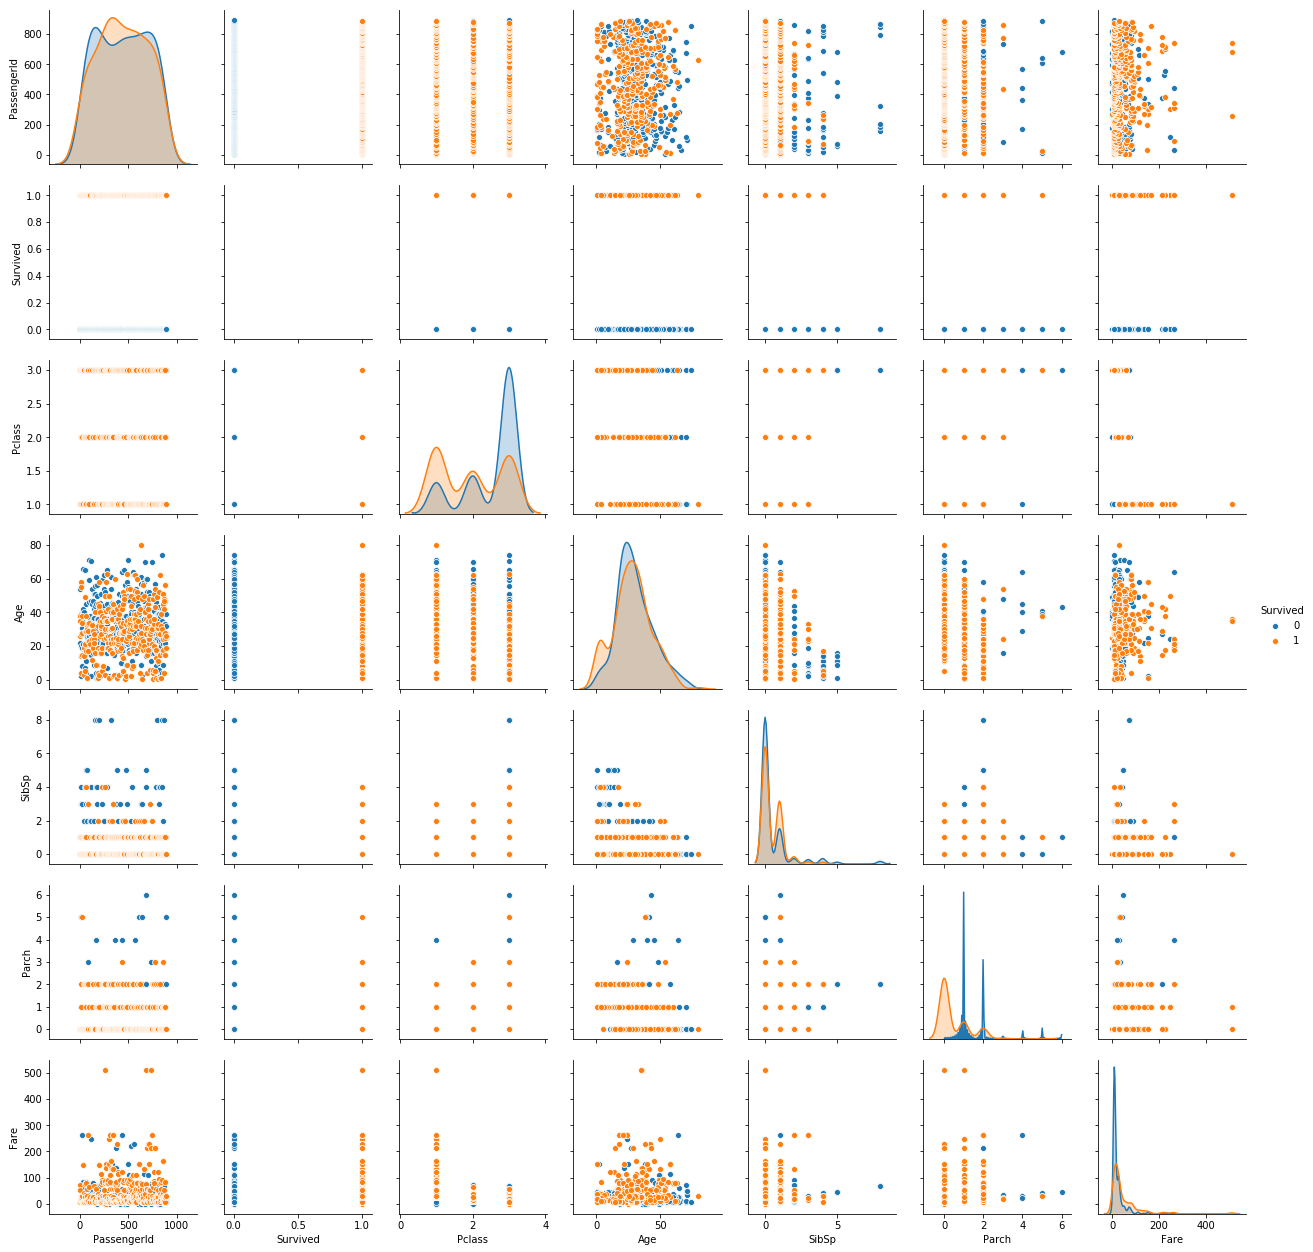

In [5]:
# Decision tree 
sns.pairplot(df,hue='Survived')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


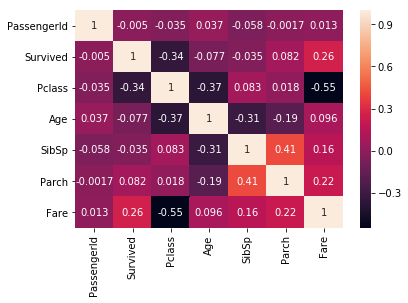

In [9]:
sns.heatmap(df.corr(),annot=True)

In [24]:
x=df[['Pclass','Sex','Age','Fare']]
x
y=df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


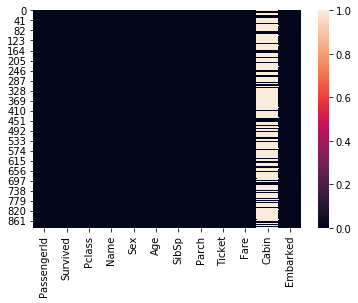

In [18]:
sns.heatmap(df.isna())

In [25]:
genders=pd.get_dummies(x['Sex'],drop_first=True)
genders
x=pd.concat([x,genders],axis='columns')
x.head(5)

,Pclass,Sex,Age,Fare,male
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [26]:
x=x.drop(columns=['Sex'])
x.head(5)

,Pclass,Age,Fare,male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc1=MinMaxScaler()
sc1.fit(x)

C:\Users\LRG\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
updated_x=sc1.transform(x)
updated_x

array([[1.        , 0.27117366, 0.01415106, 1.        ],
       [0.        , 0.4722292 , 0.13913574, 0.        ],
       [1.        , 0.32143755, 0.01546857, 0.        ],
       ...,
       [1.        , 0.2963056 , 0.04577135, 0.        ],
       [0.        , 0.32143755, 0.0585561 , 1.        ],
       [1.        , 0.39683338, 0.01512699, 1.        ]])

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
scores=cross_val_score(DecisionTreeClassifier(),x1,y1,cv=10)
scores

array([0.76666667, 0.81111111, 0.73033708, 0.75280899, 0.83146067,
       0.82022472, 0.82022472, 0.7752809 , 0.78651685, 0.80681818])

In [63]:
np.mean(scores)

0.790144989218023

In [58]:
x1=df[['Pclass','Sex','Age','Fare']]
x1
y1=y.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x1['Sex']=le.fit_transform(x1['Sex'])
x1

C:\Users\LRG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,24.0,23.4500
889,1,1,26.0,30.0000


In [60]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=10)

In [61]:
dt=DecisionTreeClassifier()
dt.fit(xtrain1,ytrain1)
dt.score(xtest1,ytest1)

0.7988826815642458